# Exercises: Introduction to pandas
By Christopher van Hoecke, Maxwell Margenot

## Lecture Link : 
https://www.quantopian.com/lectures/introduction-to-pandas

### IMPORTANT NOTE: 
This lecture corresponds to the Introduction to Pandas lecture, which is part of the Quantopian lecture series. This homework expects you to rely heavily on the code presented in the corresponding lecture. Please copy and paste regularly from that lecture when starting to work on the problems, as trying to do them from scratch will likely be too difficult.

Part of the Quantopian Lecture Series:

* [www.quantopian.com/lectures](https://www.quantopian.com/lectures)
* [github.com/quantopian/research_public](https://github.com/quantopian/research_public)



----

In [1]:
# Useful Functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

----

# Exercise 1
## a. Series 
Given an array of data, please create a pandas Series `s` with a datetime index starting `2016-01-01`. The index should be daily frequency and should be the same length as the data.

In [5]:
l = np.random.randint(1,100, size=1000)
s = pd.Series(l)

## Your code goes here
s.index = pd.date_range('2016-01-01', periods=len(s), freq='D')
s

2016-01-01    78
2016-01-02    42
2016-01-03    97
2016-01-04    58
2016-01-05    65
              ..
2018-09-22    94
2018-09-23     5
2018-09-24    19
2018-09-25    87
2018-09-26    34
Freq: D, Length: 1000, dtype: int64

## b. Accessing Series Elements.
- Print every other element of the first 50 elements of series `s`.
- Find the value associated with the index `2017-02-20`.

In [8]:
## Your code goes here
print(s.iloc[:50:2])

## Your code goes here
print(s.loc['2017-02-20'])

2016-01-01    78
2016-01-03    97
2016-01-05    65
2016-01-07    45
2016-01-09    71
2016-01-11     6
2016-01-13    94
2016-01-15    98
2016-01-17     2
2016-01-19    70
2016-01-21     1
2016-01-23    20
2016-01-25    91
2016-01-27    80
2016-01-29     2
2016-01-31    62
2016-02-02    55
2016-02-04    74
2016-02-06     4
2016-02-08    58
2016-02-10     7
2016-02-12    68
2016-02-14    71
2016-02-16    47
2016-02-18    60
Freq: 2D, dtype: int64
80


## c. Boolean Indexing.
In the series `s`, print all the values between 1 and 3.

In [13]:
## Your code goes here
s.loc[(1 < s) & (s < 3)]

2016-01-17    2
2016-01-29    2
2016-03-07    2
2017-05-16    2
2017-06-11    2
2018-05-07    2
2018-05-20    2
2018-05-28    2
2018-06-04    2
2018-08-13    2
dtype: int64

----

# Exercise 2 : Indexing and time series. 
### a. Display
Print the first and last 5 elements of the series `s`.

In [14]:
## Your code goes here
print(s.iloc[:5])

## Your code goes here
print(s.iloc[-5:])

2016-01-01    78
2016-01-02    42
2016-01-03    97
2016-01-04    58
2016-01-05    65
Freq: D, dtype: int64
2018-09-22    94
2018-09-23     5
2018-09-24    19
2018-09-25    87
2018-09-26    34
Freq: D, dtype: int64


### b. Resampling
- Using the resample method, upsample the daily data to monthly frequency. Use the median method so that each monthly value is the median price of all the days in that month.
- Take the daily data and fill in every day, including weekends and holidays, using forward-fills. 

In [15]:
# Use `pandas_datareader.DataReader` to simulate `get_pricing`.
def get_pricing(symbol, start_date='2019-1-1', end_date='2021-12-31', fields='price'):
    import pandas as pd
    from pandas_datareader import DataReader
    ticker_class = getattr(get_pricing, '_ticker_class', None)
    if ticker_class is None:
        class Ticker(object):
            def __init__(self, symbol):
                self.__symbol = symbol
            @property
            def symbol(self):
                return self.__symbol
            def __repr__(self):
                return 'Equity([%s])' % self.symbol
        ticker_class = get_pricing._ticker_class = Ticker
    if fields != 'price':
        message = "fields must be 'price'"
        raise ValueError(message)
    df = DataReader(symbol, 'yahoo', start=start_date, end=end_date)
    prices = df.Close.tz_localize('UTC')
    if isinstance(prices, pd.Series):
        prices.name = ticker_class(symbol)
    else:
        prices.columns = [ticker_class(sym) for sym in symbol]
    return prices

In [18]:
symbol = "CMG"
start = "2012-01-01"
end = "2016-01-01"
prices = get_pricing(symbol, start_date=start, end_date=end, fields="price")

## Your code goes here
monthly_prices = prices.resample('M').median()
monthly_prices.head(24)

Date
2012-01-31 00:00:00+00:00    355.505005
2012-02-29 00:00:00+00:00    378.195007
2012-03-31 00:00:00+00:00    408.994995
2012-04-30 00:00:00+00:00    420.835007
2012-05-31 00:00:00+00:00    405.240005
2012-06-30 00:00:00+00:00    402.450012
2012-07-31 00:00:00+00:00    380.470001
2012-08-31 00:00:00+00:00    295.390015
2012-09-30 00:00:00+00:00    332.809998
2012-10-31 00:00:00+00:00    286.559998
2012-11-30 00:00:00+00:00    263.779999
2012-12-31 00:00:00+00:00    282.164993
2013-01-31 00:00:00+00:00    299.589996
2013-02-28 00:00:00+00:00    315.510010
2013-03-31 00:00:00+00:00    321.555008
2013-04-30 00:00:00+00:00    340.925003
2013-05-31 00:00:00+00:00    369.820007
2013-06-30 00:00:00+00:00    364.169998
2013-07-31 00:00:00+00:00    386.299988
2013-08-31 00:00:00+00:00    405.190002
2013-09-30 00:00:00+00:00    418.880005
2013-10-31 00:00:00+00:00    442.019989
2013-11-30 00:00:00+00:00    535.929993
2013-12-31 00:00:00+00:00    522.640015
Freq: M, Name: Equity([CMG]), dtype

In [19]:
## Your code goes here
calendar_dates = pd.date_range(start=start, end=end, freq='D', tz='UTC')
calendar_prices = prices.reindex(calendar_dates, method='ffill')
calendar_prices.head(15)

2012-01-01 00:00:00+00:00           NaN
2012-01-02 00:00:00+00:00           NaN
2012-01-03 00:00:00+00:00    341.269989
2012-01-04 00:00:00+00:00    348.750000
2012-01-05 00:00:00+00:00    350.480011
2012-01-06 00:00:00+00:00    348.950012
2012-01-07 00:00:00+00:00    348.950012
2012-01-08 00:00:00+00:00    348.950012
2012-01-09 00:00:00+00:00    339.739990
2012-01-10 00:00:00+00:00    341.119995
2012-01-11 00:00:00+00:00    347.600006
2012-01-12 00:00:00+00:00    347.619995
2012-01-13 00:00:00+00:00    354.619995
2012-01-14 00:00:00+00:00    354.619995
2012-01-15 00:00:00+00:00    354.619995
Freq: D, Name: Equity([CMG]), dtype: float64

----

# Exercise 3 : Missing Data
- Replace all instances of `NaN` using the backward fill method. 
- Instead of filling, remove all instances of `NaN` from the data.

In [21]:
## Your code goes here
bfilled_prices = calendar_prices.fillna(method='bfill')
bfilled_prices.head(10)

2012-01-01 00:00:00+00:00    341.269989
2012-01-02 00:00:00+00:00    341.269989
2012-01-03 00:00:00+00:00    341.269989
2012-01-04 00:00:00+00:00    348.750000
2012-01-05 00:00:00+00:00    350.480011
2012-01-06 00:00:00+00:00    348.950012
2012-01-07 00:00:00+00:00    348.950012
2012-01-08 00:00:00+00:00    348.950012
2012-01-09 00:00:00+00:00    339.739990
2012-01-10 00:00:00+00:00    341.119995
Freq: D, Name: Equity([CMG]), dtype: float64

In [22]:
## Your code goes here
dropped_prices = calendar_prices.dropna()
dropped_prices.head(10)

2012-01-03 00:00:00+00:00    341.269989
2012-01-04 00:00:00+00:00    348.750000
2012-01-05 00:00:00+00:00    350.480011
2012-01-06 00:00:00+00:00    348.950012
2012-01-07 00:00:00+00:00    348.950012
2012-01-08 00:00:00+00:00    348.950012
2012-01-09 00:00:00+00:00    339.739990
2012-01-10 00:00:00+00:00    341.119995
2012-01-11 00:00:00+00:00    347.600006
2012-01-12 00:00:00+00:00    347.619995
Freq: D, Name: Equity([CMG]), dtype: float64

----

# Exercise 4 : Time Series Analysis with pandas
## a. General Information
Print the count, mean, standard deviation, minimum, 25th, 50th, and 75th percentiles, and the max of our series s. 

In [23]:
print("Summary Statistics")
## Your code goes here
print(s.describe())

Summary Statistics
count    1000.000000
mean       50.885000
std        28.027046
min         1.000000
25%        27.000000
50%        52.000000
75%        74.000000
max        99.000000
dtype: float64


## b. Series Operations
- Get the additive and multiplicative returns of this series. 
- Calculate the rolling mean with a 60 day window.
- Calculate the standard deviation with a 60 day window.

In [25]:
data = get_pricing('GE', fields='price', start_date='2016-01-01', end_date='2017-01-01')

## Your code goes here
add_returns = data.diff()[1:]
print(add_returns.head())

## Your code goes here
mult_returns = data.pct_change()[1:]
print(mult_returns.head())

Date
2016-01-05 00:00:00+00:00    0.028845
2016-01-06 00:00:00+00:00   -0.471153
2016-01-07 00:00:00+00:00   -1.230770
2016-01-08 00:00:00+00:00   -0.500000
2016-01-11 00:00:00+00:00    0.125000
Name: Equity([GE]), dtype: float64
Date
2016-01-05 00:00:00+00:00    0.000977
2016-01-06 00:00:00+00:00   -0.015940
2016-01-07 00:00:00+00:00   -0.042314
2016-01-08 00:00:00+00:00   -0.017950
2016-01-11 00:00:00+00:00    0.004569
Name: Equity([GE]), dtype: float64


In [28]:
# Rolling mean

## Your code goes here
rolling_mean = data.rolling(60).mean()
rolling_mean.name = "60-day rolling mean"
rolling_mean.tail()

Date
2016-12-23 00:00:00+00:00    29.042147
2016-12-27 00:00:00+00:00    29.078686
2016-12-28 00:00:00+00:00    29.111699
2016-12-29 00:00:00+00:00    29.147115
2016-12-30 00:00:00+00:00    29.180769
Name: 60-day rolling mean, dtype: float64

In [30]:
# Rolling Standard Deviation

## Your code goes here
rolling_std = data.rolling(60).std()
rolling_std.name = "60-day rolling volatility"
rolling_std.tail()

Date
2016-12-23 00:00:00+00:00    1.180726
2016-12-27 00:00:00+00:00    1.196871
2016-12-28 00:00:00+00:00    1.207905
2016-12-29 00:00:00+00:00    1.216772
2016-12-30 00:00:00+00:00    1.222694
Name: 60-day rolling volatility, dtype: float64

----

# Exercise 5 : DataFrames
## a. Indexing
Form a DataFrame out of `dict_data` with `l` as its index.

In [32]:
l = {'fifth','fourth', 'third', 'second', 'first'}
dict_data = {'a' : [1, 2, 3, 4, 5], 'b' : ['L', 'K', 'J', 'M', 'Z'],'c' : np.random.normal(0, 1, 5)}

## Your code goes here
frame_data = pd.DataFrame(dict_data, index=l)
frame_data

,a,b,c
second,1,L,1.052030
first,2,K,-0.256763
fifth,3,J,0.812633
third,4,M,-0.079486
fourth,5,Z,0.842871


## b. DataFrames Manipulation
- Concatenate the following two series to form a dataframe. 
- Rename the columns to `Good Numbers` and `Bad Numbers`. 
- Change the index to be a datetime index starting on `2016-01-01`.

In [35]:
s1 = pd.Series([2, 3, 5, 7, 11, 13], name='prime')
s2 = pd.Series([1, 4, 6, 8, 9, 10], name='other')

## Your code goes here
numbers = pd.concat([s1, s2], axis=1)
print(numbers)

## Your code goes here
numbers.columns = ['Good Numbers', 'Bad Numbers']
print(numbers)

## Your code goes here
numbers.index = pd.date_range(start='2016-01-01', periods=len(numbers), freq='D')
print(numbers)

   prime  other
0      2      1
1      3      4
2      5      6
3      7      8
4     11      9
5     13     10
   Good Numbers  Bad Numbers
0             2            1
1             3            4
2             5            6
3             7            8
4            11            9
5            13           10
            Good Numbers  Bad Numbers
2016-01-01             2            1
2016-01-02             3            4
2016-01-03             5            6
2016-01-04             7            8
2016-01-05            11            9
2016-01-06            13           10


----

# Exercise 6 : Accessing DataFrame elements.
## a. Columns
- Check the data type of one of the DataFrame's columns.
- Print the values associated with time range `2013-01-01` to `2013-01-10`.

In [45]:
symbol = ["XOM", "BP", "COP", "TOT"]
start = "2012-01-01"
end = "2016-01-01"
prices = get_pricing(symbol, start_date=start, end_date=end, fields="price")
if isinstance(symbol, list):
    prices.columns = map(lambda x: x.symbol, prices.columns)
else:
    prices.name = symbol

# Check Type of Data for these two.    
prices.XOM.head()
prices.loc[:, 'XOM'].head()

Date
2012-01-03 00:00:00+00:00    86.000000
2012-01-04 00:00:00+00:00    86.019997
2012-01-05 00:00:00+00:00    85.760002
2012-01-06 00:00:00+00:00    85.120003
2012-01-09 00:00:00+00:00    85.500000
Name: XOM, dtype: float64

In [46]:
## Your code goes here
print(type(prices.XOM))

<class 'pandas.core.series.Series'>


In [47]:
## Your code goes here
print(prices.loc['2013-01-01':'2013-01-10'])

                                 XOM         BP        COP        TOT
Date                                                                 
2013-01-02 00:00:00+00:00  88.709999  42.419998  59.209999  52.570000
2013-01-03 00:00:00+00:00  88.550003  43.270000  59.169998  52.180000
2013-01-04 00:00:00+00:00  88.959999  43.660000  59.830002  52.310001
2013-01-07 00:00:00+00:00  87.930000  43.400002  59.169998  51.689999
2013-01-08 00:00:00+00:00  88.480003  43.400002  58.369999  51.580002
2013-01-09 00:00:00+00:00  88.139999  44.270000  58.250000  51.549999
2013-01-10 00:00:00+00:00  89.099998  45.009998  58.500000  52.380001


----

# Exercise 7 : Boolean Indexing
## a. Filtering.
- Filter pricing data from the last question (stored in `prices`) to only print values where:
    - BP > 30
    - XOM < 100
    - The intersection of both above conditions (BP > 30 **and** XOM < 100)
    - The union of the previous composite condition along with TOT having no `nan` values ((BP > 30 **and** XOM < 100) **or** TOT is non-`NaN`).
- Add a column for TSLA and drop the column for XOM.

In [48]:
# Filter the data for prices to only print out values where
# BP > 30
print(prices.loc[prices.BP > 30])

# XOM < 100
print(prices.loc[prices.XOM < 100])

# BP > 30 AND XOM < 100
print(prices.loc[(prices.BP > 30) & (prices.XOM < 100)])

# The union of (BP > 30 AND XOM < 100) with TOT being non-nan
print(prices.loc[(prices.BP > 30) & (prices.XOM < 100) | (~prices.TOT.isnull())])

                                 XOM         BP        COP        TOT
Date                                                                 
2012-01-03 00:00:00+00:00  86.000000  44.139999  56.541019  52.470001
2012-01-04 00:00:00+00:00  86.019997  44.750000  56.274208  52.270000
2012-01-05 00:00:00+00:00  85.760002  44.250000  55.824444  51.209999
2012-01-06 00:00:00+00:00  85.120003  44.080002  55.389919  50.750000
2012-01-09 00:00:00+00:00  85.500000  44.070000  55.603371  51.250000
...                              ...        ...        ...        ...
2015-12-24 00:00:00+00:00  79.330002  32.119999  48.590000  45.889999
2015-12-28 00:00:00+00:00  78.739998  31.709999  47.189999  45.369999
2015-12-29 00:00:00+00:00  79.160004  31.870001  47.770000  45.849998
2015-12-30 00:00:00+00:00  78.110001  31.309999  46.599998  45.160000
2015-12-31 00:00:00+00:00  77.949997  31.260000  46.689999  44.950001

[1003 rows x 4 columns]
                                 XOM         BP        COP       

In [49]:
# Add a column for TSLA and drop the column for XOM
prices.loc[:, 'TSLA'] = get_pricing('TSLA', start_date=start, end_date=end, fields="price")
prices = prices.drop('XOM', axis=1)
prices.head()

,BP,COP,TOT,TSLA
Date,,,,
2012-01-03 00:00:00+00:00,44.139999,56.541019,52.470001,5.616
2012-01-04 00:00:00+00:00,44.750000,56.274208,52.270000,5.542
2012-01-05 00:00:00+00:00,44.250000,55.824444,51.209999,5.424
2012-01-06 00:00:00+00:00,44.080002,55.389919,50.750000,5.382
2012-01-09 00:00:00+00:00,44.070000,55.603371,51.250000,5.450


In [50]:
get_pricing('TSLA', start_date=start, end_date=end, fields="price")

Date
2012-01-03 00:00:00+00:00     5.616000
2012-01-04 00:00:00+00:00     5.542000
2012-01-05 00:00:00+00:00     5.424000
2012-01-06 00:00:00+00:00     5.382000
2012-01-09 00:00:00+00:00     5.450000
                               ...    
2015-12-24 00:00:00+00:00    46.113998
2015-12-28 00:00:00+00:00    45.790001
2015-12-29 00:00:00+00:00    47.438000
2015-12-30 00:00:00+00:00    47.618000
2015-12-31 00:00:00+00:00    48.001999
Name: Equity([TSLA]), Length: 1006, dtype: float64

In [53]:
from pandas_datareader import DataReader
df = DataReader('TSLA', 'yahoo', start=start, end=end)
df.loc[:, 'Adj Close']

Date
2012-01-03     5.616000
2012-01-04     5.542000
2012-01-05     5.424000
2012-01-06     5.382000
2012-01-09     5.450000
                ...    
2015-12-24    46.113998
2015-12-28    45.790001
2015-12-29    47.438000
2015-12-30    47.618000
2015-12-31    48.001999
Name: Adj Close, Length: 1006, dtype: float64

## b. DataFrame Manipulation (again)
- Concatenate these DataFrames.
- Fill the missing data with 0s

In [55]:
# Concatenate these dataframes
df_1 = get_pricing(['SPY', 'VXX'], start_date=start, end_date=end, fields='price')
df_2 = get_pricing(['MSFT', 'AAPL', 'GOOG'], start_date=start, end_date=end, fields='price')

## Your code goes here
df_3 = pd.concat([df_1, df_2], axis=1)
df_3

/home/huaidong.xhd/Documents/envs/jupyter-pyenv/python-env/.pyenv/versions/3.7.7/lib/python3.7/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'VXX', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)


,Equity([SPY]),Equity([VXX]),Equity([MSFT]),Equity([AAPL]),Equity([GOOG])
Date,,,,,
2012-01-03 00:00:00+00:00,127.500000,NaN,26.770000,14.686786,331.462585
2012-01-04 00:00:00+00:00,127.699997,NaN,27.400000,14.765714,332.892242
2012-01-05 00:00:00+00:00,128.039993,NaN,27.680000,14.929643,328.274536
2012-01-06 00:00:00+00:00,127.709999,NaN,28.110001,15.085714,323.796326
2012-01-09 00:00:00+00:00,128.020004,NaN,27.740000,15.061786,310.067780
...,...,...,...,...,...
2015-12-24 00:00:00+00:00,205.679993,NaN,55.669998,27.007500,748.400024
2015-12-28 00:00:00+00:00,205.210007,NaN,55.950001,26.705000,762.510010
2015-12-29 00:00:00+00:00,207.399994,NaN,56.549999,27.184999,776.599976


In [56]:
# Fill GOOG missing data with 0
filled0_df_3 = df_3.fillna(0)
filled0_df_3

,Equity([SPY]),Equity([VXX]),Equity([MSFT]),Equity([AAPL]),Equity([GOOG])
Date,,,,,
2012-01-03 00:00:00+00:00,127.500000,0.0,26.770000,14.686786,331.462585
2012-01-04 00:00:00+00:00,127.699997,0.0,27.400000,14.765714,332.892242
2012-01-05 00:00:00+00:00,128.039993,0.0,27.680000,14.929643,328.274536
2012-01-06 00:00:00+00:00,127.709999,0.0,28.110001,15.085714,323.796326
2012-01-09 00:00:00+00:00,128.020004,0.0,27.740000,15.061786,310.067780
...,...,...,...,...,...
2015-12-24 00:00:00+00:00,205.679993,0.0,55.669998,27.007500,748.400024
2015-12-28 00:00:00+00:00,205.210007,0.0,55.950001,26.705000,762.510010
2015-12-29 00:00:00+00:00,207.399994,0.0,56.549999,27.184999,776.599976


----

# Exercise 8 : Time Series Analysis
## a. Summary
- Print out a summary of the `prices` DataFrame from above.
- Take the log returns and print the first 10 values.
- Print the multiplicative returns of each company.
- Normalize and plot the returns from 2014 to 2015.
- Plot a 60 day window rolling mean of the prices.
- Plot a 60 day window rolling standfard deviation of the prices.

In [58]:
# Print a summary of the 'prices' times series.
## Your code goes here
prices.describe()

,BP,COP,TOT,TSLA
count,1006.000000,1006.000000,1006.000000,1006.000000
mean,42.466451,63.255591,54.068310,29.493241
std,4.734563,9.160613,7.140752,17.935438
min,29.379999,42.189999,42.139999,4.558000
25%,40.400002,56.495001,49.310001,7.017000
50%,42.160000,62.295000,51.910000,35.629999
75%,45.925000,69.332497,58.267500,45.421500
max,53.380001,86.760002,73.879997,57.208000


In [60]:
# Print the natural log returns of the first 10 values
## Your code goes here
np.log(prices).head(10)

,BP,COP,TOT,TSLA
Date,,,,
2012-01-03 00:00:00+00:00,3.787366,4.034966,3.960242,1.725620
2012-01-04 00:00:00+00:00,3.801091,4.030236,3.956423,1.712355
2012-01-05 00:00:00+00:00,3.789855,4.022212,3.935935,1.690834
2012-01-06 00:00:00+00:00,3.786006,4.014398,3.926912,1.683060
2012-01-09 00:00:00+00:00,3.785779,4.018244,3.936716,1.695616
2012-01-10 00:00:00+00:00,3.793014,4.022894,3.941776,1.709102
2012-01-11 00:00:00+00:00,3.785552,4.005412,3.928683,1.730947
2012-01-12 00:00:00+00:00,3.788725,3.987901,3.915417,1.731656
2012-01-13 00:00:00+00:00,3.778949,3.981947,3.904596,1.516884


In [61]:
# Print the Muliplicative returns 
## Your code goes here
mult_returns = prices.pct_change()[1:]
mult_returns

,BP,COP,TOT,TSLA
Date,,,,
2012-01-04 00:00:00+00:00,0.013820,-0.004719,-0.003812,-0.013177
2012-01-05 00:00:00+00:00,-0.011173,-0.007992,-0.020279,-0.021292
2012-01-06 00:00:00+00:00,-0.003842,-0.007784,-0.008983,-0.007743
2012-01-09 00:00:00+00:00,-0.000227,0.003854,0.009852,0.012635
2012-01-10 00:00:00+00:00,0.007261,0.004661,0.005073,0.013578
...,...,...,...,...
2015-12-24 00:00:00+00:00,-0.007110,-0.008974,-0.007569,0.003788
2015-12-28 00:00:00+00:00,-0.012765,-0.028813,-0.011331,-0.007026
2015-12-29 00:00:00+00:00,0.005046,0.012291,0.010580,0.035990


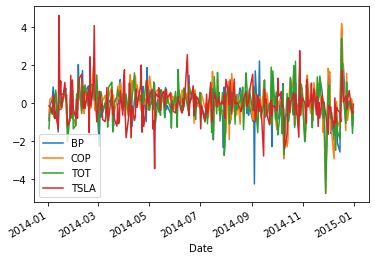

In [63]:
# Normlalize the returns and plot 
## Your code goes here
norm_returns = (mult_returns - mult_returns.mean(axis=0))/mult_returns.std(axis=0)
norm_returns.loc['2014-01-01':'2015-01-01'].plot();

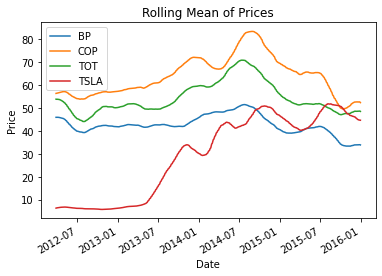

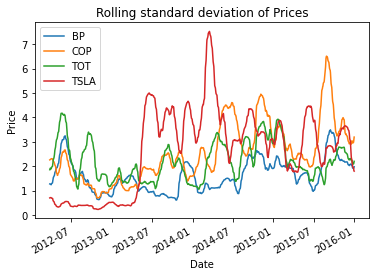

In [64]:
# Rolling mean
rolling_mean = prices.rolling(window=60).mean()
rolling_mean.columns = prices.columns

# Rolling standard deviation
rolling_std = prices.rolling(window=60).std()
rolling_mean.columns = prices.columns

# Plotting 
mean = rolling_mean.plot();
plt.title("Rolling Mean of Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend();

std = rolling_std.plot();
plt.title("Rolling standard deviation of Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend();

---

Congratulations on completing the Introduction to pandas exercises!

As you learn more about writing trading algorithms and the Quantopian platform, be sure to check out the daily [Quantopian Contest](https://www.quantopian.com/contest), in which you can compete for a cash prize every day.

Start by going through the [Writing a Contest Algorithm](https://www.quantopian.com/tutorials/contest) Tutorial.

*This presentation is for informational purposes only and does not constitute an offer to sell, a solicitation to buy, or a recommendation for any security; nor does it constitute an offer to provide investment advisory or other services by Quantopian, Inc. ("Quantopian"). Nothing contained herein constitutes investment advice or offers any opinion with respect to the suitability of any security, and any views expressed herein should not be taken as advice to buy, sell, or hold any security or as an endorsement of any security or company.  In preparing the information contained herein, Quantopian, Inc. has not taken into account the investment needs, objectives, and financial circumstances of any particular investor. Any views expressed and data illustrated herein were prepared based upon information, believed to be reliable, available to Quantopian, Inc. at the time of publication. Quantopian makes no guarantees as to their accuracy or completeness. All information is subject to change and may quickly become unreliable for various reasons, including changes in market conditions or economic circumstances.*